## Analyze A/B Test Results


## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)



<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')

b. Use the cell below to find the number of rows in the dataset.

In [3]:
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [4]:
df.head(15)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [5]:
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [8]:
df[df['converted']==1].count()[0]

35237

In [9]:
proportion = df[df['converted']==1].count()[0]/df.shape[0]
proportion

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [10]:
df[df['landing_page']=='new_page'].count()[0]

147239

In [12]:
df[df['group']=='treatment'].count()[0]

147276

In [13]:
old_treat = df.query('landing_page == "old_page" and group == "treatment"').user_id.size
old_treat

1965

In [14]:
new_control =df.query('landing_page == "new_page" and group == "control"').user_id.nunique()
new_control

1928

In [16]:
new_treat = new_control + old_treat
new_treat

3893

f. Do any of the rows have missing values?

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [18]:
df_old = df.query('landing_page == "old_page" and group == "control"') 
df_new = df.query('landing_page == "new_page" and group == "treatment"')

In [19]:
df2 = df_old.append(df_new , ignore_index=True)

In [21]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,864975,2017-01-21 01:52:26.210827,control,old_page,1
3,936923,2017-01-10 15:20:49.083499,control,old_page,0
4,719014,2017-01-17 01:48:29.539573,control,old_page,0


In [22]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [25]:
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [27]:
sum(df2['user_id'].duplicated())

1

In [28]:
df2[df2['user_id'].duplicated()]

,user_id,timestamp,group,landing_page,converted
146678,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [29]:
df2.iloc[146678]

user_id                             773192
timestamp       2017-01-14 02:55:59.590927
group                            treatment
landing_page                      new_page
converted                                0
Name: 146678, dtype: object

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [30]:
df2 = df2.drop(index=146678)

In [31]:
df2 = df2.reset_index(drop=True)

In [32]:
df2.tail(15)

,user_id,timestamp,group,landing_page,converted
290569,909437,2017-01-18 14:49:49.064452,treatment,new_page,0
290570,776137,2017-01-12 05:53:12.386730,treatment,new_page,0
290571,883344,2017-01-22 23:15:58.645325,treatment,new_page,0
290572,825594,2017-01-06 12:37:08.897784,treatment,new_page,0
290573,937338,2017-01-19 03:23:22.236666,treatment,new_page,0
290574,733101,2017-01-23 12:52:58.711914,treatment,new_page,0
290575,679096,2017-01-02 16:43:49.237940,treatment,new_page,0
290576,691699,2017-01-09 23:42:35.963486,treatment,new_page,0
290577,807595,2017-01-22 10:43:09.285426,treatment,new_page,0
290578,846225,2017-01-16 15:24:46.705903,treatment,new_page,0


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [33]:
df2[df2['converted']==1].count()[0]

34753

In [35]:
df2[df2['converted']==1].count()[0]/df2.shape[0]

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [36]:
df2[df2['group'] == "control"].count()[0]

145274

In [37]:
df2.query(' group == "control" and converted ==1 ').count()[0]/df2[df2['group'] == "control"].count()[0]

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [39]:
df2.query(' group == "treatment" and converted ==1 ').count()[0]/df2[df2['group'] == "treatment"].count()[0]

0.11880806551510564

d. What is the probability that an individual received the new page?

In [43]:
df2[df2['landing_page'] == "new_page"].count()[0]/df2.shape[0]

0.5000619442226688

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**The probability of an `individual converting` regardless of the page they receive is `11.905%` i.e 12% .  The probability of an individual was in the `control group` is `12.03` %  .The probability of an individual was in the `treatment group` is `11.88%` i.e 12% again. Thus we can't say  that the new treatment page leads to more conversions. The difference is -0.001576**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$H_0: p_{old} - p_{new} \geq 0$

$H_1: p_{old} - p_{new} \lt 0$


`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [56]:
p_new =df2[df2['converted']==1].count()[0]/df2.shape[0]
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [57]:
p_old =df2[df2['converted']==1].count()[0]/df2.shape[0]
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [58]:
n_new = df2.query('group == "treatment"').user_id.nunique()
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [59]:
n_old = df2.query('group == "control"').user_id.nunique()
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [69]:
new_page_converted = np.random.choice([0,1], size=145310, p=[1-0.1195970872, 0.1195970872])

In [61]:
new_page_converted

array([0, 0, 0, ..., 0, 0, 0])

## REVIEWED : SUGGESTION :
### When possible, it is always more computationally efficient to use numpy built-in operations over explicit for loops. 

In [73]:
new_page_converted1=np.random.binomial(n_new, p_new)
new_page_converted1

17428

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [74]:
old_page_converted = np.random.choice([0,1], size=145274, p=[1-0.1195970872, 0.1195970872])

In [75]:
old_page_converted

array([0, 0, 0, ..., 0, 1, 0])

## REVIEWED : SUGGESTION :
### When possible, it is always more computationally efficient to use numpy built-in operations over explicit for loops. 

In [76]:
old_page_converted1=np.random.binomial(n_old, p_new)
old_page_converted1

17427

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [77]:
new_mean = new_page_converted.mean() 
old_mean = old_page_converted.mean()
diff = new_mean - old_mean
diff

-0.0019084683374972766

In [78]:
print (format(diff, '.8f'))

-0.00190847


In [79]:
diff=new_page_converted1/n_new-old_page_converted1/n_old
diff

-2.283767731996178e-05

In [80]:
print (format(diff, '.8f'))

-0.00002284


h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [48]:
p_diffs = []

for i in range(10000):
    control_df = np.random.choice([0,1], size=145274, p=[1-0.1195970872, 0.1195970872])
    treatment_df = np.random.choice([0,1], size=145310, p=[1-0.1195970872, 0.1195970872])
    p_old = control_df.mean()
    p_new = treatment_df.mean()
    p_diffs.append(p_new - p_old)



In [49]:
p_diffs = np.array(p_diffs)

In [50]:
null_vals = np.random.normal(0, p_diffs.std(), p_diffs.size)

## REVIEWED : SUGGESTION :
### When possible, it is always more computationally efficient to use numpy built-in operations over explicit for loops. 

In [82]:
p_diffs=[]
p_diffs = np.random.binomial(n_new, p_new, 10000)/n_new - np.random.binomial(n_old, p_new, 10000)/n_old 

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

Text(0.5, 1.0, 'Distribution of p_diffs')

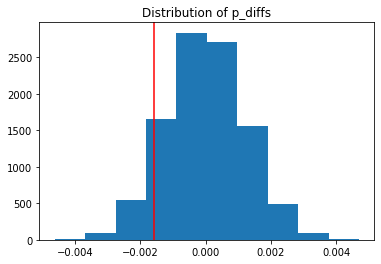

In [83]:
plt.hist(p_diffs)
plt.axvline(x=-0.001576, color='r')
plt.title('Distribution of p_diffs')

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [84]:
(p_diffs > -0.001576).mean()

0.9038

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**`(p_diffs > -0.001576).mean()` : `P-Value(0.9 > 0.05)` which indicates the probability of the acceptance of the Null.The smaller the p-value, the stronger the evidence that you should reject the null hypothesis. A p-value less than 0.05 `(typically ≤ 0.05) is statistically significant`. It indicates strong evidence against the null hypothesis, as there is less than a 5% probability the null is correct (and the results are random).Therefore the actual difference observed in ab_data.csv is -0.001576, which should be considered `insignificant` .**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [85]:
import statsmodels.api as sm

convert_old = df2.query('group == "control" and converted == 1').user_id.nunique()
convert_new = df2.query('group == "treatment" and converted == 1').user_id.nunique()
n_old = df2.query('group == "control"').user_id.nunique()
n_new = df2.query('group == "treatment"').user_id.nunique()

In [86]:
convert_old , convert_new 

(17489, 17264)

In [87]:
n_old , n_new

(145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [88]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new])
z_score, p_value

(1.3109241984234394, 0.18988337448195103)

In [89]:
from scipy.stats import norm

norm.cdf(1.3109241984234394), norm.ppf(1-(0.05))

(0.9050583127590245, 1.6448536269514722)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**The z-score of 1.311 does not exceeds the critical value of 1.645  and the P-value is 0.905 larger than alpha 0.05, this means we can't reject the null hypothesis ($H_{0}$) that the difference between the two proportions is no different from zero. .**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic Regression.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [90]:
df2['intercept'] = 1

In [91]:
df2[['new_page','old_page']] = pd.get_dummies(df2['landing_page'])

In [92]:
df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']

In [93]:
df2.head(10)

,user_id,timestamp,group,landing_page,converted,intercept,new_page,old_page,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1,0
2,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1,0
3,936923,2017-01-10 15:20:49.083499,control,old_page,0,1,0,1,0
4,719014,2017-01-17 01:48:29.539573,control,old_page,0,1,0,1,0
5,644214,2017-01-22 02:05:21.719434,control,old_page,1,1,0,1,0
6,847721,2017-01-17 14:01:00.090575,control,old_page,0,1,0,1,0
7,650559,2017-01-24 11:55:51.084801,control,old_page,0,1,0,1,0
8,935734,2017-01-17 20:33:37.428378,control,old_page,0,1,0,1,0
9,746742,2017-01-23 11:38:29.592148,control,old_page,0,1,0,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [94]:
log_model = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
result = log_model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [95]:
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

In [96]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sat, 11 Jul 2020   Pseudo R-squ.:               8.077e-06
Time:                        00:24:40   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**- P-value is 0.19 (P-Value$ \gt$ 0.05) which means 'ab_page' is not that `significant` .
$H_0$ in this model is that 'ab_page' is totally insignificant in predicting the responses . Again we can't reject $H_0$ because 'ab_page' is not that significant , it's probability is 19%. In Part II, null=new page is not better than old page, alternative=new page is better.So Part II is a one-sided test.In the Part III, conversion rate depends on landing page, therefore it is a two-sided hypothesis test.**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**When we add more terms, our model becomes more accurate .But overfitting, the difficulty of interpretting its coefficient if it goes higher terms these are several concerns if we add more terms.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [97]:
countries_df = pd.read_csv('countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [98]:
df_new.head(10)

,country,timestamp,group,landing_page,converted,intercept,new_page,old_page,ab_page
user_id,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1
909908,UK,2017-01-06 20:44:26.334764,treatment,new_page,0,1,1,0,1
811617,US,2017-01-02 18:42:11.851370,treatment,new_page,1,1,1,0,1
938122,US,2017-01-10 09:32:08.222716,treatment,new_page,1,1,1,0,1
887018,US,2017-01-06 11:09:40.487196,treatment,new_page,0,1,1,0,1


In [100]:
df_new.country.unique()

array(['UK', 'US', 'CA'], dtype=object)

In [101]:
df_new[['US','UK','CA']] = pd.get_dummies(df_new['country'])

In [103]:
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,new_page,old_page,ab_page,US,UK,CA
user_id,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0,1,0


In [104]:
df = df_new.copy()

In [105]:
df.reset_index(level=0, inplace=True)
df.head()

,user_id,country,timestamp,group,landing_page,converted,intercept,new_page,old_page,ab_page,US,UK,CA
0,834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0,0,1,0
1,928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1,0,0,1
2,822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,1,0
3,711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0,0,1,0
4,710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0,1,0


In [106]:
df.drop(['country'], axis=1 , inplace = True)
df.head()

,user_id,timestamp,group,landing_page,converted,intercept,new_page,old_page,ab_page,US,UK,CA
0,834778,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0,0,1,0
1,928468,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1,0,0,1
2,822059,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,1,0
3,711597,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0,0,1,0
4,710616,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0,1,0


In [107]:
df2  = pd.merge(df2, df, on=[ 'user_id','landing_page', 'converted' , 'timestamp' ,'group' , 'new_page' , 'old_page' ,
                               'intercept' , 'ab_page'], how='left')
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,new_page,old_page,ab_page,US,UK,CA
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1,0,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1,0,0,0,1
2,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1,0,0,0,1
3,936923,2017-01-10 15:20:49.083499,control,old_page,0,1,0,1,0,0,0,1
4,719014,2017-01-17 01:48:29.539573,control,old_page,0,1,0,1,0,0,0,1


In [109]:
log_model_2 = sm.Logit(df2['converted'], df2[['intercept','US','UK']])
result = log_model_2.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Sat, 11 Jul 2020   Pseudo R-squ.:               1.521e-05
Time:                        00:29:20   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9967      0.007   -292.314      0.000      -2.010      -1.983
US            -0.0408      0.027     -1.518      0.129      -0.093       0.012
UK             0.0099      0.013      0.746      0.456      -0.016       0.036
==============================================================================
"""

**Here the baseline is CA .**
- The coef for UK is 0.0099.
- This means users in CA is 1.01 times likely to convert, relative to users in UK.
- The coef for US is -0.0408. 
- This means users in CA is exp(-0.0408) = 1.049 times likely to convert relative to users in US.
- The p-value of US = 0.129   (0.129 > 0.05 ) `statistically insignificant.`
- The p-value of UK = 0.456   (0.456 > 0.05 ) `statistically insignificant.`

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [113]:
df2['US_ab_page'] = df2['US'] * df2['ab_page']
df2['CA_ab_page'] = df2['CA'] * df2['ab_page']

In [114]:
df2.head(15)

,user_id,timestamp,group,landing_page,converted,intercept,new_page,old_page,ab_page,US,UK,CA,US_ab_page,CA_ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1,0,0,0,1,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1,0,0,0,1,0,0
2,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1,0,0,0,1,0,0
3,936923,2017-01-10 15:20:49.083499,control,old_page,0,1,0,1,0,0,0,1,0,0
4,719014,2017-01-17 01:48:29.539573,control,old_page,0,1,0,1,0,0,0,1,0,0
5,644214,2017-01-22 02:05:21.719434,control,old_page,1,1,0,1,0,0,0,1,0,0
6,847721,2017-01-17 14:01:00.090575,control,old_page,0,1,0,1,0,0,0,1,0,0
7,650559,2017-01-24 11:55:51.084801,control,old_page,0,1,0,1,0,1,0,0,0,0
8,935734,2017-01-17 20:33:37.428378,control,old_page,0,1,0,1,0,0,0,1,0,0
9,746742,2017-01-23 11:38:29.592148,control,old_page,0,1,0,1,0,0,0,1,0,0


In [116]:
df2[df2['ab_page']==1]

,user_id,timestamp,group,landing_page,converted,intercept,new_page,old_page,ab_page,US,UK,CA,US_ab_page,CA_ab_page
145274,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,1,0,0,1,0,1
145275,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,1,0,0,1,0,1
145276,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,0,1,1,0,0,1,0
145277,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1,0,1,0,1,0,0,0
145278,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290579,677163,2017-01-03 19:41:51.902148,treatment,new_page,0,1,1,0,1,0,0,1,0,1
290580,925675,2017-01-07 20:38:26.346410,treatment,new_page,0,1,1,0,1,0,0,1,0,1
290581,643562,2017-01-02 19:20:05.460595,treatment,new_page,0,1,1,0,1,1,0,0,1,0
290582,822004,2017-01-04 03:36:46.071379,treatment,new_page,0,1,1,0,1,1,0,0,1,0


In [117]:
log_model_2 = sm.Logit(df2['converted'], df2[['intercept','US_ab_page','CA_ab_page' ]])
result = log_model_2.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Sat, 11 Jul 2020   Pseudo R-squ.:               3.272e-05
Time:                        00:47:13   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                   0.03077
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9873      0.007   -275.573      0.000      -2.001      -1.973
US_ab_page    -0.0842      0.038     -2.225      0.026      -0.158      -0.010
CA_ab_page    -0.0197      0.012     -1.634      0.102      -0.043       0.004
==============================================================================
"""

- coef for US_ab_page = -0.0842
- This means users in control group is exp(-0.0842) time like to be converted relative to treatment group, holding everything else constant.
-  coef for UK_ab_page = -0.0197
- This means users in control group is exp(-0.0197) time like to be converted relative to treatment group, holding everything else constant.
- p-value of US_ab_page is 0.026 which is (0.026 < 0.05 ) `statistically significant .`
- p-value of UK_ab_page is 0.102 which is (0.102 > 0.05 ) `statistically insignificant .`

In [119]:
log_model_uk = sm.Logit(df2['converted'], df2[['intercept','ab_page','UK']])
result = log_model_uk.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.366117
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Sat, 11 Jul 2020   Pseudo R-squ.:               1.233e-05
Time:                        00:56:27   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.2693
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9919      0.009   -228.420      0.000      -2.009      -1.975
ab_page       -0.0150      0.011     -1.309      0.191      -0.037       0.007
UK             0.0126      0.013      0.952      0.341      -0.013       0.038
==============================================================================
"""

In [120]:
lm=sm.Logit(df2['converted'], df2[['intercept', 'ab_page', 'CA', 'UK']])
results=lm.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sat, 11 Jul 2020   Pseudo R-squ.:               2.323e-05
Time:                        00:56:38   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
CA             0.0408      0.027      1.516      0.130      -0.012       0.093
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
==============================================================================
"""

- coef for ab_page = -0.0149. 
- This means users in control group is exp(-0.0149) = 1.015 time like to be converted relative to treatment group, holding everything else constant.
- coef for CA = -0.048. 
- This means users in US are exp(-0.0149) = 1.049 times likely to be converted relative to users in CA, holding everything else constant.
- Coef for UK = 0.0099. exp(0.0099)=1.01.
- This means users in UK is 1.01 times likely to be converted relative to users in US, holding everything else constant.

- The coefficients obtained here are not different from those obtained in previous sections. Therefore I conclude that there is no effects whether to include single or multiple variables. The variables ab_page and country seem to be independent on each other.
- The P values for CA and UK are large, so  the results are statistically insignificant.

## Conclusions based on the results.

- In A/B testing, A one-sided hypothesis testing: whether new page leads to more conversion rate. 
  - The null is old page is better than new page. 
  - The alternative is new page is better. 
  - The resulted p value is 0.9, therefore failed to reject null.
  - Conclude that new page is not better.
  
- In the logistic regression method, conversion rate depends on landing page, therefore it is a two-sided hypothesis test.
  - The null is there is no difference between the conversion rate of old and new page.
  - The alternative is there is a difference.
  - The resulted p value is  0.2, therefore failed to reject null. 
  - Conclude that no difference between the conversion rate of old and new page.
  
-  whether country matters in conversion rate.
   - didn't find any statistically significant evidence that country matters.

In [121]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0